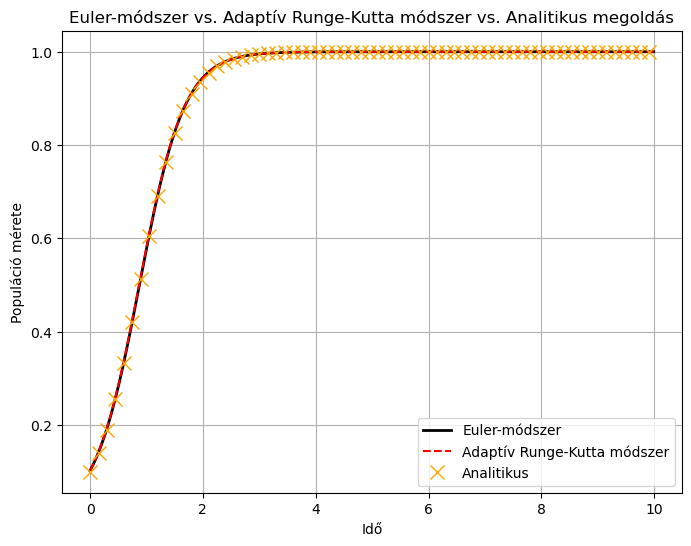

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#analitikus megoldás a logisztikus egyenletre
def logistic_analytical(t, x0, r):
    return 1 / (1 + (1 / x0 - 1) * np.exp(-r * t))

euler_data = np.loadtxt('task1/euler_data.txt')
rk_data = np.loadtxt('task1/runge_kutta_data.txt')

#paraméterek
x0 = 0.1  # kezdeti érték
r = 2.5   # paraméter
dt = 0.01 # időlépés
steps = 1000 # lépésszám

t = np.linspace(0, dt * steps, steps+1)

x_analytical = logistic_analytical(t, x0, r)

plt.figure(figsize= (8,6))
plt.plot(euler_data[:, 0], euler_data[:, 1], label='Euler-módszer', color = "black", lw = 2)
plt.plot(rk_data[:, 0], rk_data[:, 1], label='Adaptív Runge-Kutta módszer', ls = "--", color = "red")
plt.plot(t[::15], x_analytical[::15], label='Analitikus', ls = ' ', marker = 'x', color = "orange", markersize = 10)
plt.xlabel('Idő')
plt.ylabel('Populáció mérete')
plt.title('Euler-módszer vs. Adaptív Runge-Kutta módszer vs. Analitikus megoldás')
plt.legend()
plt.grid()
plt.show()


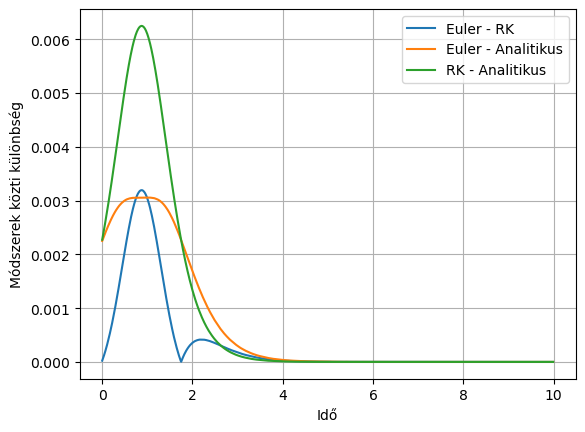

In [2]:
diff1 = euler_data[:,1]-rk_data[:,1] # euler - rk
diff2 = euler_data[:,1] - x_analytical[:-1] #euler - analitikus
diff3 = rk_data[:,1] - x_analytical[:-1] # euler - rungekutta
plt.plot(euler_data[:,0],np.abs(diff1), label = "Euler - RK")
plt.plot(euler_data[:,0],np.abs(diff2), label = "Euler - Analitikus")
plt.plot(euler_data[:,0],np.abs(diff3), label = "RK - Analitikus")
plt.xlabel('Idő')
plt.ylabel('Módszerek közti különbség')
plt.legend()
plt.grid()

In [3]:
#fix pontok, ahol a derivált nulla
diffrunge = rk_data[1:,1]-rk_data[:-1,1]
diffeuler = euler_data[1:,1]-euler_data[:-1,1]

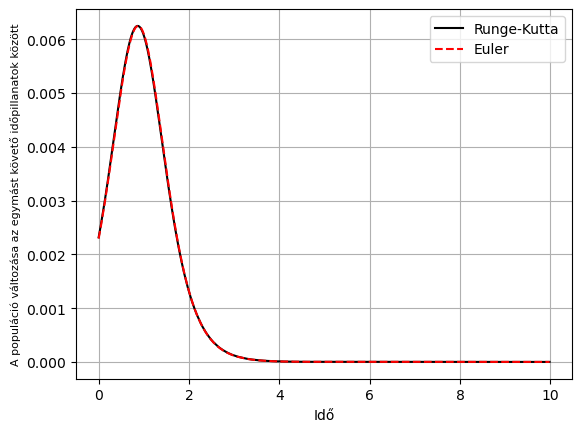

In [4]:
plt.plot(rk_data[:-1,0],diffrunge, color = "black", label = "Runge-Kutta")
plt.plot(euler_data[:-1,0],diffeuler, ls = '--', color = "red", label = "Euler")
plt.xlabel('Idő')
plt.ylabel('A populáció változása az egymást követő időpillanatok között', size = 8)
plt.grid()
plt.legend()

In [5]:
#Fólia ábrák
r = [-1,-0.5,0,0.5,1]
x0 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

/tmp/ipykernel_217/4293972408.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / (1 + (1 / x0 - 1) * np.exp(-r * t))


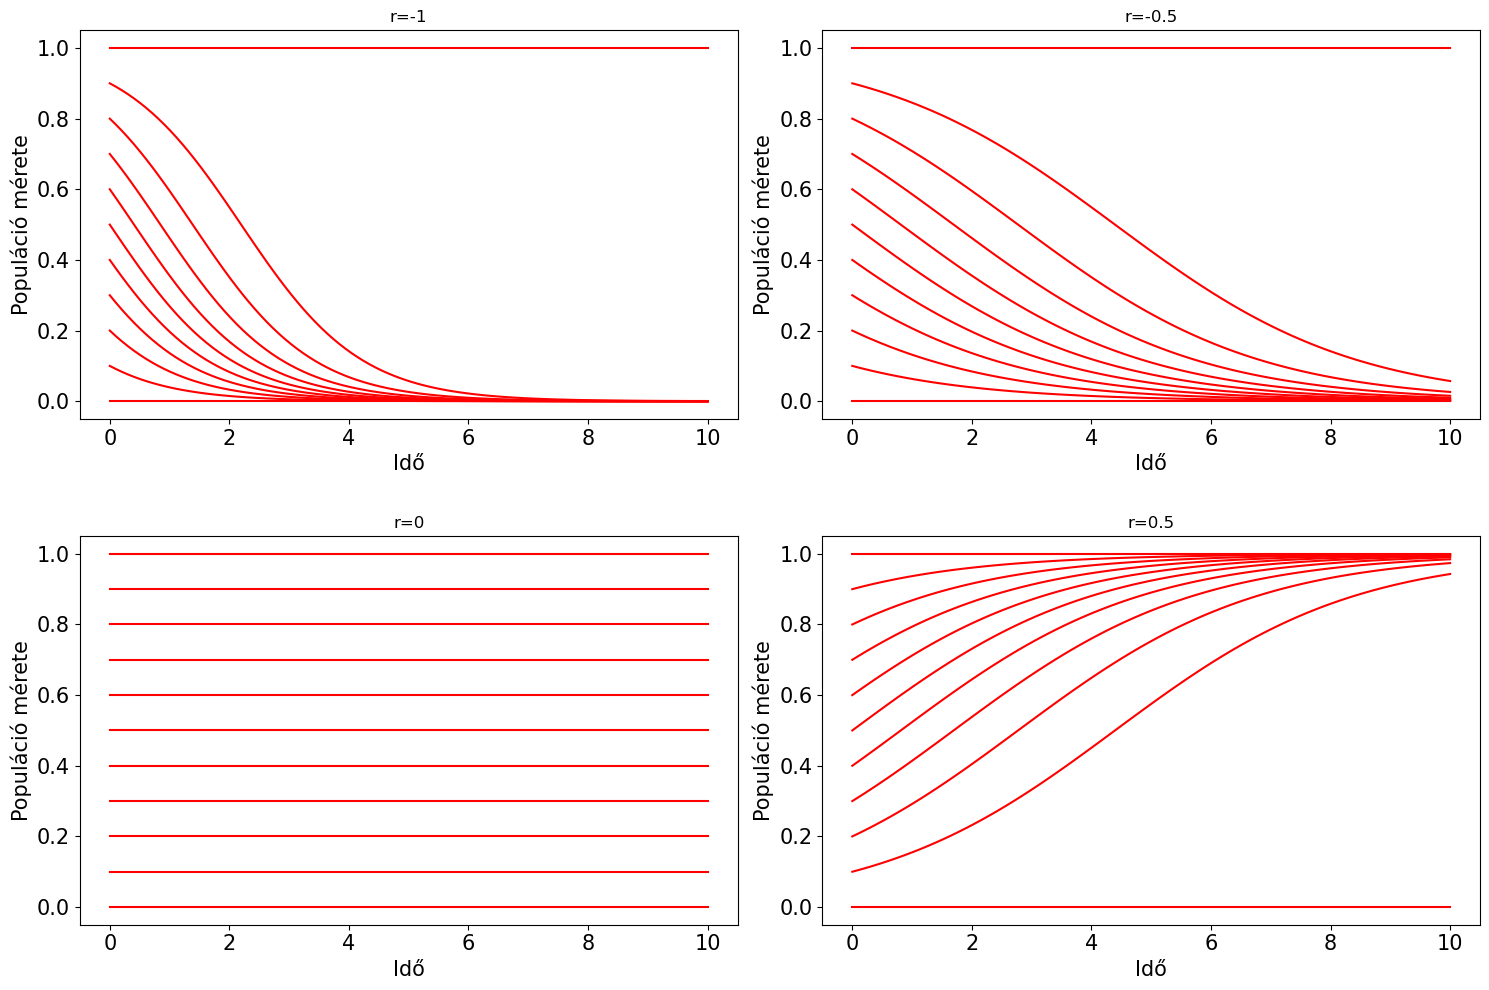

In [6]:
import numpy as np
import matplotlib.pyplot as plt

r_values = [-1, -0.5, 0, 0.5]
x0_values = np.linspace(0, 1, 11)
t = np.linspace(0, 10, 100)

# subplot
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, r in enumerate(r_values):  
    for x0 in x0_values:
        x_analytical = logistic_analytical(t, x0, r)
        axs[idx // 2, idx % 2].plot(t, x_analytical, 'r', label=f'r={r}')

for idx, ax in enumerate(axs.flat):
    r = r_values[idx]
    ax.set_title(f'r={r}')
    ax.set_xlabel('Idő', size = 15)
    ax.set_ylabel('Populáció mérete', size = 15)
    ax.tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout(h_pad=3.0)

plt.show()


/tmp/ipykernel_217/4293972408.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 / (1 + (1 / x0 - 1) * np.exp(-r * t))


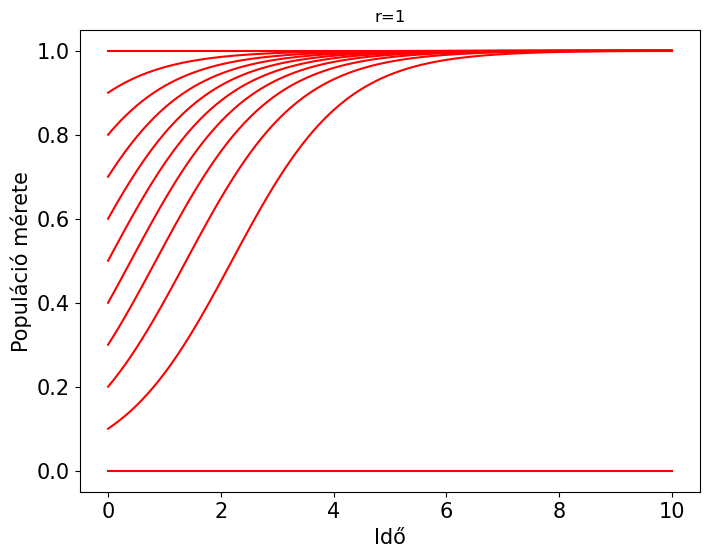

In [7]:
import numpy as np
import matplotlib.pyplot as plt

r = 1
x0_values = np.linspace(0, 1, 11)
t = np.linspace(0, 10, 100)


fig, ax = plt.subplots(figsize=(8, 6))


for x0 in x0_values:
    x_analytical = logistic_analytical(t, x0, r)
    ax.plot(t, x_analytical, 'r', label=f'r={r}, x0={x0}')

ax.set_title(f'r={r}')
ax.set_xlabel('Idő', size=15)
ax.set_ylabel('Populáció mérete', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


plt.show()


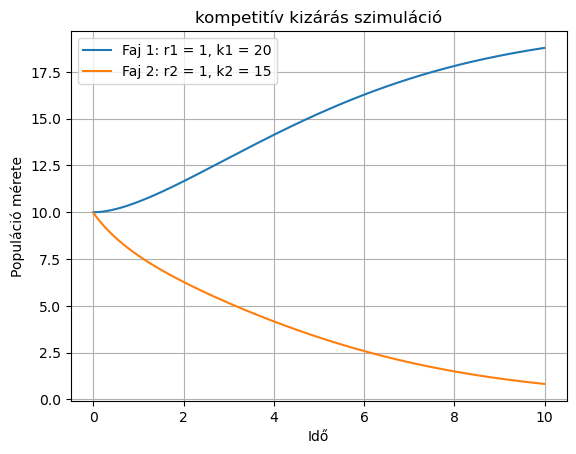

In [8]:
#task 2
data = np.loadtxt('task2/competitive_exclusion_data.txt')

t = data[:, 0]
n1_values = data[:, 1]
n2_values = data[:, 2]

plt.plot(t, n1_values, label='Faj 1: r1 = 1, k1 = 20')
plt.plot(t, n2_values, label='Faj 2: r2 = 1, k2 = 15')
plt.xlabel('Idő')
plt.ylabel('Populáció mérete')
plt.title('kompetitív kizárás szimuláció')
plt.legend()
plt.grid()


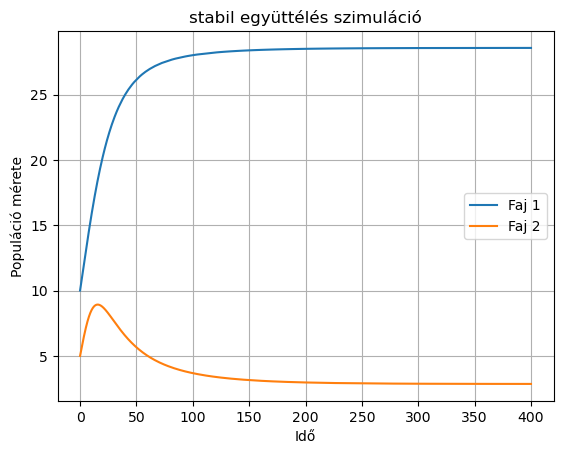

In [9]:
#task 2

data = np.loadtxt('task2/competitive_exclusion_data2.txt')

t = data[:, 0]
n1_values = data[:, 1]
n2_values = data[:, 2]

plt.plot(t, n1_values, label='Faj 1')
plt.plot(t, n2_values, label='Faj 2')
plt.xlabel('Idő')
plt.ylabel('Populáció mérete')
plt.title('stabil együttélés szimuláció')
plt.legend()
plt.grid()


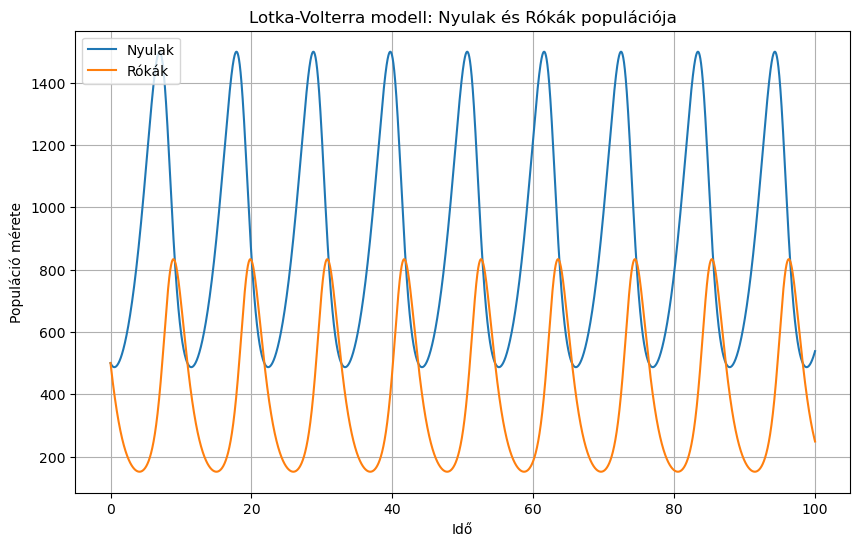

In [10]:
#Task 3
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('task3/lotka_volterra_data.txt')

time = data[:, 0]
rabbit_population = data[:, 1]
fox_population = data[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(time, rabbit_population, label='Nyulak')
plt.plot(time, fox_population, label='Rókák')
plt.xlabel('Idő')
plt.ylabel('Populáció mérete')
plt.title('Lotka-Volterra modell: Nyulak és Rókák populációja')
plt.legend()
plt.grid(True)
plt.show()


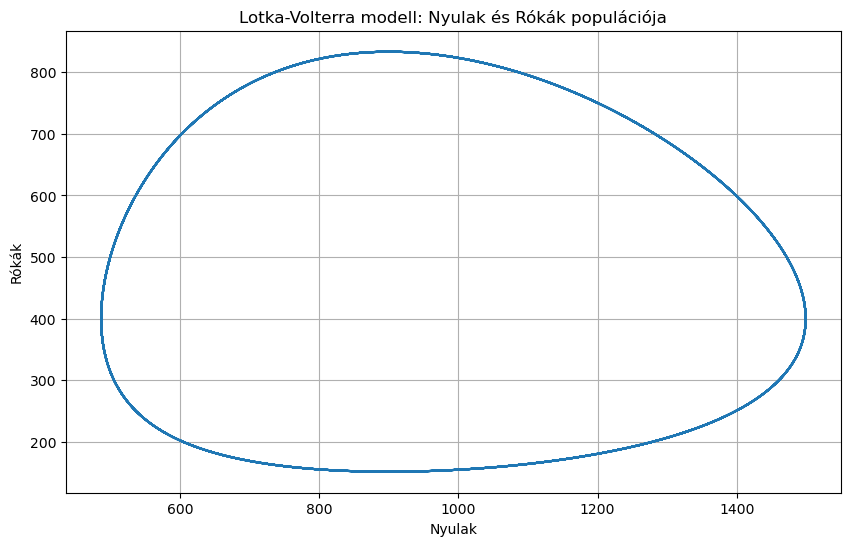

In [11]:
#Task 3
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('task3/lotka_volterra_data.txt')

time = data[:, 0]
rabbit_population = data[:, 1]
fox_population = data[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(rabbit_population, fox_population)
plt.xlabel('Nyulak')
plt.ylabel('Rókák')
plt.title('Lotka-Volterra modell: Nyulak és Rókák populációja')
plt.grid(True)
plt.show()


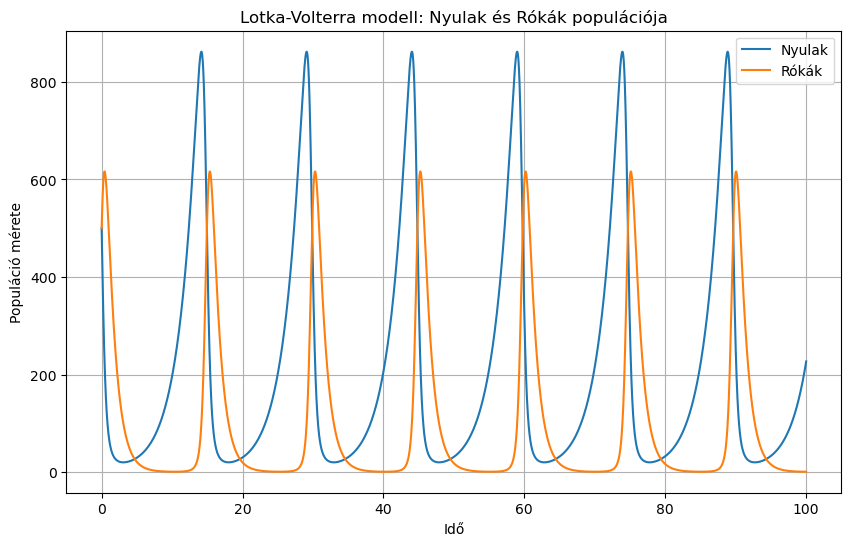

In [12]:
#Task 3
import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt('task3/lotka_volterra_data2.txt')

time = data[:, 0]
rabbit_population = data[:, 1]
fox_population = data[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(time, rabbit_population, label='Nyulak')
plt.plot(time, fox_population, label='Rókák')
plt.xlabel('Idő')
plt.ylabel('Populáció mérete')
plt.title('Lotka-Volterra modell: Nyulak és Rókák populációja')
plt.legend()
plt.grid(True)
plt.show()


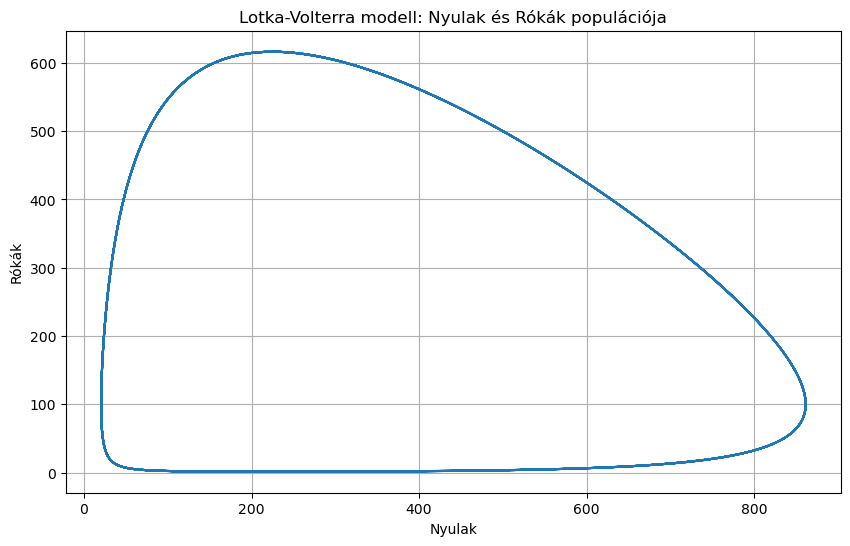

In [13]:
#Task 3
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('task3/lotka_volterra_data2.txt')

time = data[:, 0]
rabbit_population = data[:, 1]
fox_population = data[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(rabbit_population, fox_population)
plt.xlabel('Nyulak')
plt.ylabel('Rókák')
plt.title('Lotka-Volterra modell: Nyulak és Rókák populációja')
plt.grid(True)
plt.show()


# task 4

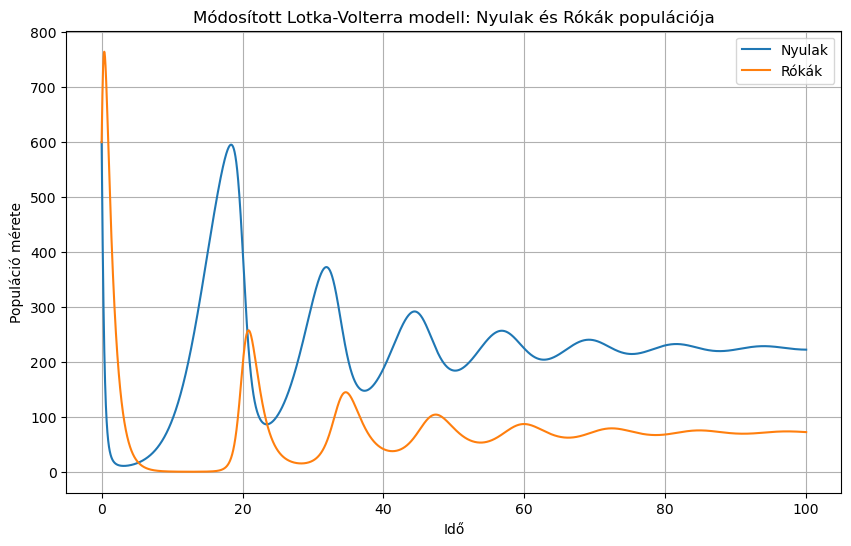

In [14]:
# Fájl beolvasása
data = np.loadtxt('task4/lotka_volterra_modified_data.txt')

time = data[:, 0]
rabbit_population = data[:, 1]
fox_population = data[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(time, rabbit_population, label='Nyulak')
plt.plot(time, fox_population, label='Rókák')
plt.xlabel('Idő')
plt.ylabel('Populáció mérete')
plt.title('Módosított Lotka-Volterra modell: Nyulak és Rókák populációja')
plt.legend()
plt.grid(True)
plt.show()


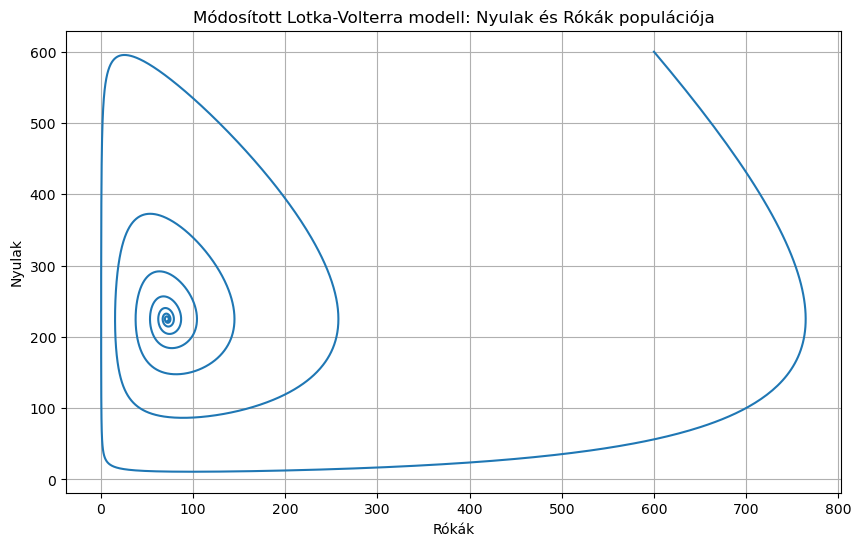

In [15]:
data = np.loadtxt('task4/lotka_volterra_modified_data.txt')

time = data[:, 0]
rabbit_population = data[:, 1]
fox_population = data[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(fox_population, rabbit_population)
plt.xlabel('Rókák')
plt.ylabel('Nyulak')
plt.title('Módosított Lotka-Volterra modell: Nyulak és Rókák populációja')
plt.grid(True)
plt.show()
